In [26]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
inp = pd.read_csv("bank_marketing.csv")
inp = pd.read_csv("bank_marketing.csv", skiprows=2)
inp.head()


,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


# Step 1: Basic EDA

In [27]:
inp.head(5)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [28]:
inp.tail()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
45206,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45207,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45208,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45209,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no
45210,45211,37.0,120000,2971,married,"entrepreneur,secondary",yes,no,no,no,cellular,17,"nov, 2017",6.01666666666667 min,2,188,11,other,no


In [52]:
inp['Job']= inp.jobedu.apply(lambda x:x.split(',')[1])

In [55]:
inp['Edu']= inp.jobedu.apply(lambda x:x.split(',')[1])
inp.drop('jobedu', axis=1,inplace=True)

In [56]:
inp.head()

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,Job,Edu
0,1,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,tertiary,tertiary
1,2,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,secondary,secondary
2,3,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,secondary,secondary
3,4,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,unknown,unknown
4,5,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [57]:
inp[['month_name', 'year']] = inp['month'].str.split(', ', expand=True, n=1)

In [58]:
inp.drop('month', axis=1,inplace=True)

In [59]:
inp.head()

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,...,duration,campaign,pdays,previous,poutcome,response,Job,Edu,month_name,year
0,1,58.0,100000,2143,married,yes,no,yes,no,unknown,...,261 sec,1,-1,0,unknown,no,tertiary,tertiary,may,2017
1,2,44.0,60000,29,single,yes,no,yes,no,unknown,...,151 sec,1,-1,0,unknown,no,secondary,secondary,may,2017
2,3,33.0,120000,2,married,yes,no,yes,yes,unknown,...,76 sec,1,-1,0,unknown,no,secondary,secondary,may,2017
3,4,47.0,20000,1506,married,no,no,yes,no,unknown,...,92 sec,1,-1,0,unknown,no,unknown,unknown,may,2017
4,5,33.0,0,1,single,no,no,no,no,unknown,...,198 sec,1,-1,0,unknown,no,unknown,unknown,may,2017



# Summary statistics of the dataset

In [60]:
print("Summary statistics:")
inp.describe()

Summary statistics:


,customerid,age,salary,balance,day,campaign,pdays,previous
count,44724.000000,44724.000000,44724.000000,44724.000000,44724.000000,44724.000000,44724.000000,44724.000000
mean,22406.898958,40.544093,57036.266881,1345.344491,15.812718,2.770682,40.000000,0.573428
std,12974.171098,9.976201,32229.518100,2983.219087,8.324820,3.108579,100.193608,2.300735
min,1.000000,18.000000,0.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,11181.750000,33.000000,20000.000000,71.000000,8.000000,1.000000,-1.000000,0.000000
50%,22362.500000,39.000000,60000.000000,442.000000,16.000000,2.000000,-1.000000,0.000000
75%,33603.250000,48.000000,70000.000000,1408.000000,21.000000,3.000000,-1.000000,0.000000
max,45211.000000,70.000000,120000.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


# Shape of the dataset


In [61]:
print("Shape of the dataset:", inp.shape)

Shape of the dataset: (44724, 21)


### Step 2: Handling Missing Values
### Count missing values in each column

In [62]:
print("Missing values in each column:")
print(inp.isnull().sum())

Missing values in each column:
customerid     0
age            0
salary         0
balance        0
marital        0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
Job            0
Edu            0
month_name    50
year          50
dtype: int64


# Handle missing values in 'age' column (you can use median or mean based on data distribution)

In [63]:
inp['age'].fillna(inp['age'].median(), inplace=True)

# Verify that there are no missing values in 'age'

In [64]:
print("Missing values in 'age' after handling:", inp['age'].isnull().sum())

Missing values in 'age' after handling: 0


# Drop duplicates

In [65]:
inp = inp.drop_duplicates()

In [66]:
# Verify shape after dropping duplicates
print("Shape after dropping duplicates:", inp.shape)

Shape after dropping duplicates: (44724, 21)


## Step 4: Identifying Outliers using Boxplot
## Boxplot to check for outliers in 'age'


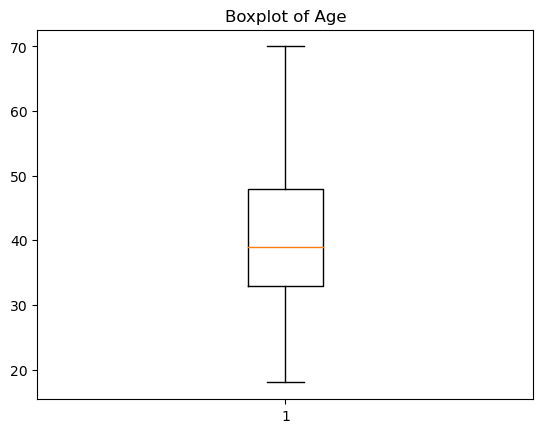

In [67]:
plt.boxplot(inp['age'])
plt.title("Boxplot of Age")
plt.show()

In [68]:
# Handling outliers using the IQR method
Q1 = inp['age'].quantile(0.25)
Q3 = inp['age'].quantile(0.75)
IQR = Q3 - Q1

In [69]:
# Filter out outliers
inp = inp[(inp['age'] >= Q1 - 1.5 * IQR) & (inp['age'] <= Q3 + 1.5 * IQR)]

In [70]:
# Verify shape after handling outliers
print("Shape after handling outliers:", inp.shape)

Shape after handling outliers: (44724, 21)


# Step 5: Data Encoding
# One-hot encoding for 'job' column

In [74]:

inp = pd.get_dummies(inp, columns=['Job'], drop_first=True)

In [75]:
# Label encoding for 'education' column
le = LabelEncoder()
inp['Edu'] = le.fit_transform(inp['Edu'])

In [77]:
# Verify the encoded columns
print("Data after encoding:")
inp.head()

Data after encoding:


,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,...,pdays,previous,poutcome,response,Edu,month_name,year,Job_secondary,Job_tertiary,Job_unknown
0,1,58.0,100000,2143,married,yes,no,yes,no,unknown,...,-1,0,unknown,no,2,may,2017,0,1,0
1,2,44.0,60000,29,single,yes,no,yes,no,unknown,...,-1,0,unknown,no,1,may,2017,1,0,0
2,3,33.0,120000,2,married,yes,no,yes,yes,unknown,...,-1,0,unknown,no,1,may,2017,1,0,0
3,4,47.0,20000,1506,married,no,no,yes,no,unknown,...,-1,0,unknown,no,3,may,2017,0,0,1
4,5,33.0,0,1,single,no,no,no,no,unknown,...,-1,0,unknown,no,3,may,2017,0,0,1


# Step 6: Univariate, Bivariate, and Multivariate Analysis

### Univariate Analysis
### Histogram for 'age'

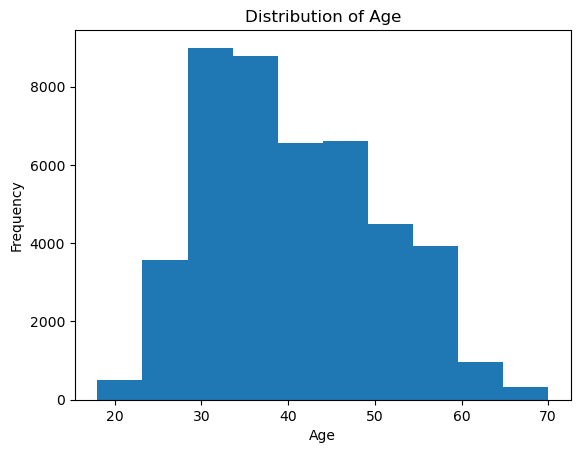

In [80]:
plt.hist(inp['age'], bins=10)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

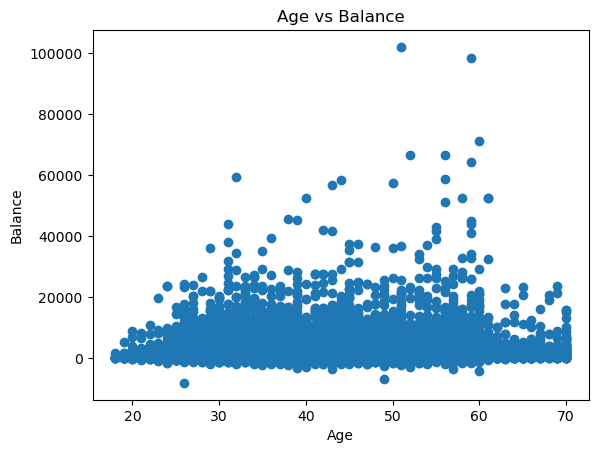

In [81]:
# Bivariate Analysis
# Scatter plot between 'age' and 'balance'
plt.scatter(inp['age'], inp['balance'])
plt.title("Age vs Balance")
plt.xlabel("Age")
plt.ylabel("Balance")
plt.show()

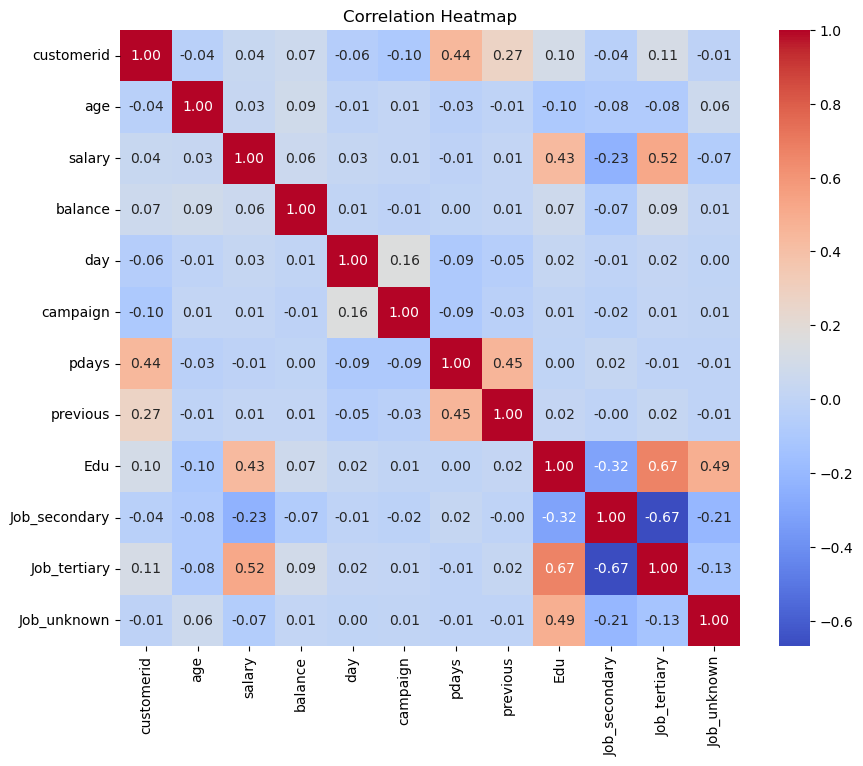

In [82]:

# Multivariate Analysis
# Correlation heatmap
corr_matrix = inp.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()